In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

above_price_df = pd.read_csv('cleaned sheets/Metro_sold_above_list.csv')
below_price_df = pd.read_csv('cleaned sheets/Metro_sold_below_list.csv')



In [54]:
# Basic information 
print("Above Price Dataset:")
print(above_price_df.info())

print("\nBelow Price Dataset:")
print(below_price_df.info())

Above Price Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    577 non-null    int64  
 1   SizeRank    577 non-null    int64  
 2   RegionName  577 non-null    object 
 3   RegionType  577 non-null    object 
 4   StateName   577 non-null    object 
 5   3/31/2018   322 non-null    float64
 6   4/30/2018   325 non-null    float64
 7   5/31/2018   327 non-null    float64
 8   6/30/2018   327 non-null    float64
 9   7/31/2018   331 non-null    float64
 10  8/31/2018   333 non-null    float64
 11  9/30/2018   334 non-null    float64
 12  10/31/2018  337 non-null    float64
 13  11/30/2018  341 non-null    float64
 14  12/31/2018  343 non-null    float64
 15  1/31/2019   346 non-null    float64
 16  2/28/2019   360 non-null    float64
 17  3/31/2019   366 non-null    float64
 18  4/30/2019   369 non-null    float64
 19  5/31/201

In [55]:
print("Missing values in above_price_df:")
print(above_price_df.isnull().sum())

above_price_df.dropna(inplace=True)


Missing values in above_price_df:
RegionID       0
SizeRank       0
RegionName     0
RegionType     0
StateName      0
              ..
6/30/2023     18
7/31/2023     17
8/31/2023     12
9/30/2023      5
10/31/2023     0
Length: 73, dtype: int64


In [56]:
# Summary statistics
print("Above Price Summary Statistics:")
print(above_price_df.describe())

print("\nBelow Price Summary Statistics:")
print(below_price_df.describe())

Above Price Summary Statistics:
            RegionID    SizeRank   3/31/2018   4/30/2018   5/31/2018  \
count     282.000000  282.000000  282.000000  282.000000  282.000000   
mean   407131.000000  233.890071    0.193506    0.214367    0.235181   
std     72576.058666  171.569888    0.103431    0.115455    0.124772   
min    102001.000000    0.000000    0.036336    0.041648    0.050612   
25%    394533.750000   88.250000    0.121924    0.131258    0.143275   
50%    394810.000000  196.500000    0.163840    0.190410    0.210256   
75%    395058.500000  365.750000    0.243365    0.274667    0.296213   
max    845160.000000  744.000000    0.775204    0.819905    0.825652   

        6/30/2018   7/31/2018   8/31/2018   9/30/2018  10/31/2018  ...  \
count  282.000000  282.000000  282.000000  282.000000  282.000000  ...   
mean     0.248547    0.249830    0.239960    0.224644    0.207879  ...   
std      0.126031    0.122756    0.115286    0.105912    0.096066  ...   
min      0.055240    0.

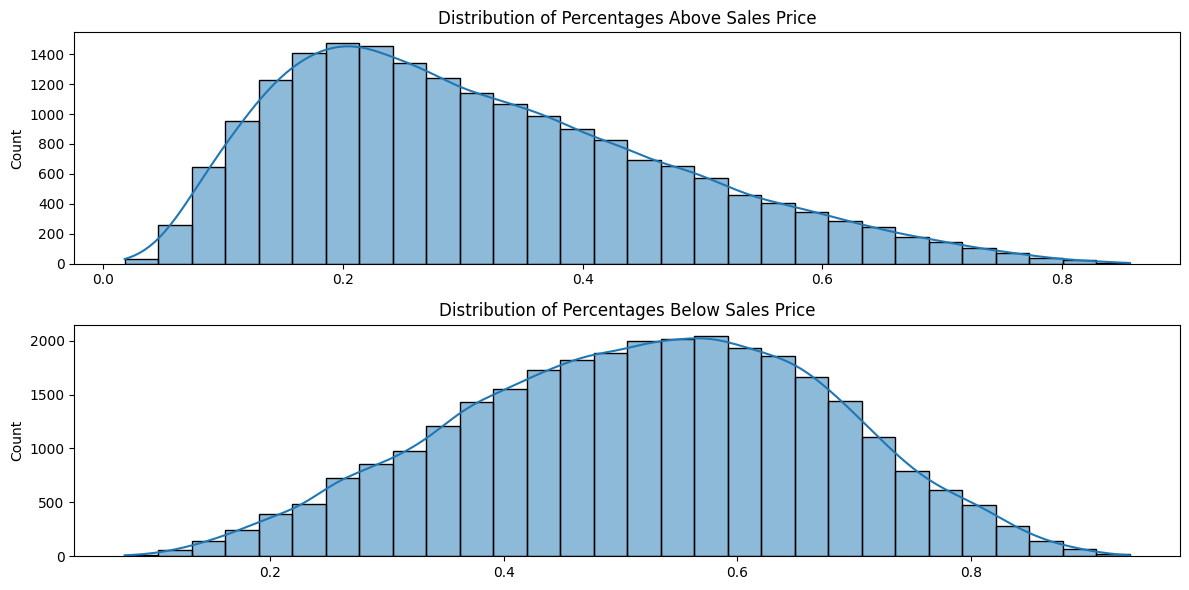

In [57]:
# Plot distribution 
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(above_price_df.iloc[:, 5:].values.flatten(), bins=30, kde=True)
plt.title("Distribution of Percentages Above Sales Price")

plt.subplot(2, 1, 2)
sns.histplot(below_price_df.iloc[:, 5:].values.flatten(), bins=30, kde=True)
plt.title("Distribution of Percentages Below Sales Price")

plt.tight_layout()
plt.show()

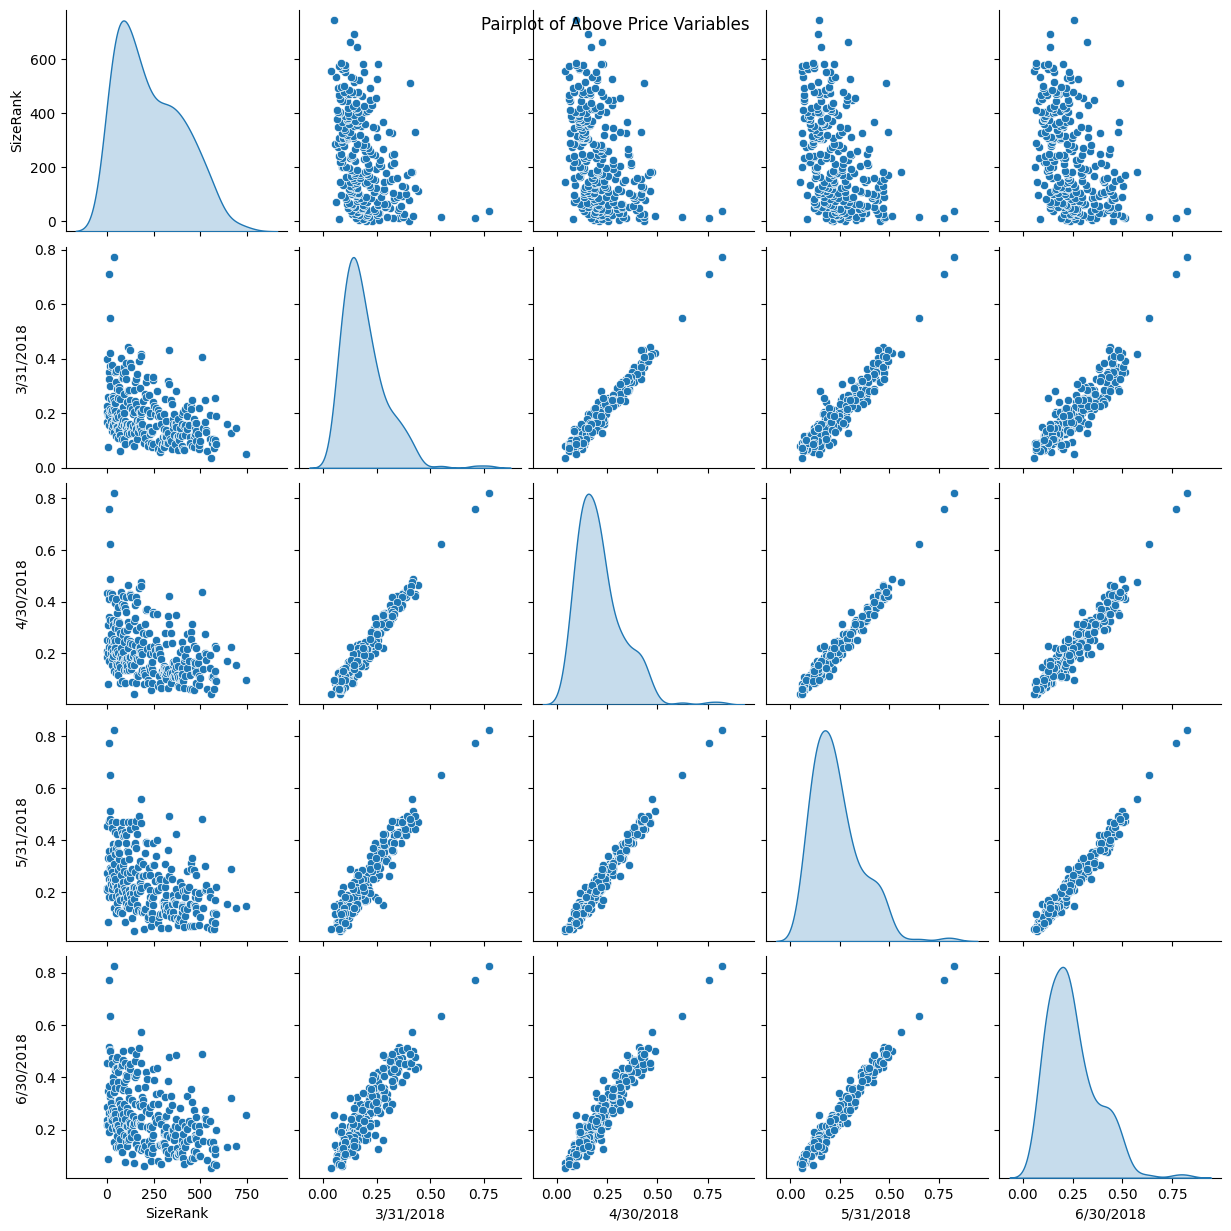

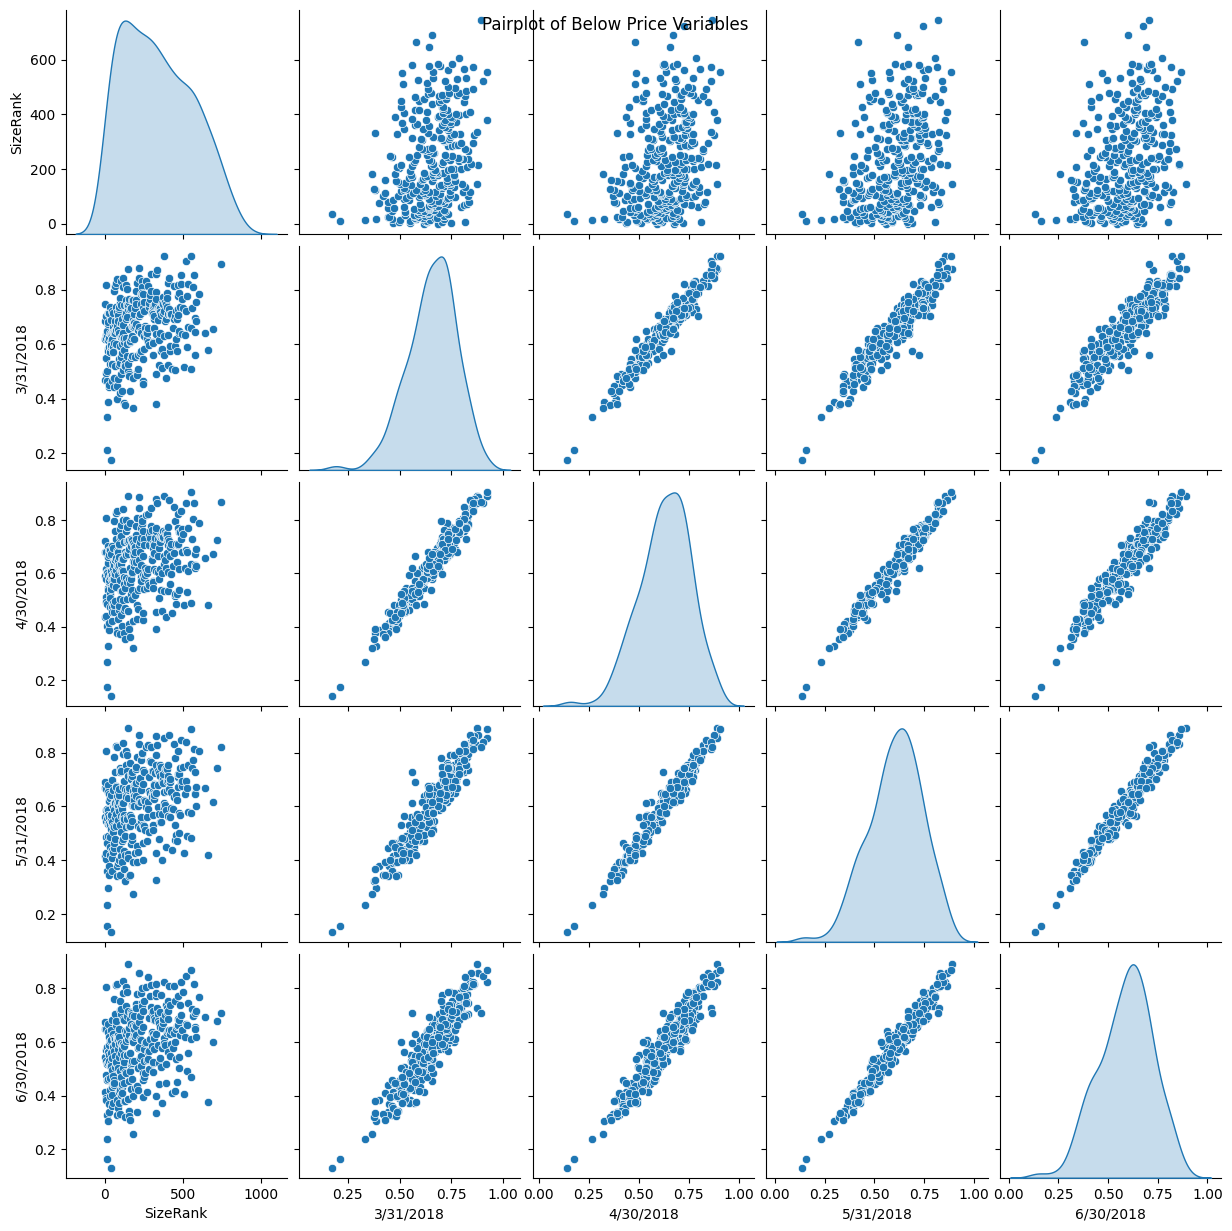

In [58]:
# Explore relationships between variables
sns.pairplot(above_price_df[['SizeRank', '3/31/2018', '4/30/2018', '5/31/2018', '6/30/2018']], diag_kind='kde')
plt.suptitle("Pairplot of Above Price Variables")
plt.show()

sns.pairplot(below_price_df[['SizeRank', '3/31/2018', '4/30/2018', '5/31/2018', '6/30/2018']], diag_kind='kde')
plt.suptitle("Pairplot of Below Price Variables")
plt.show()

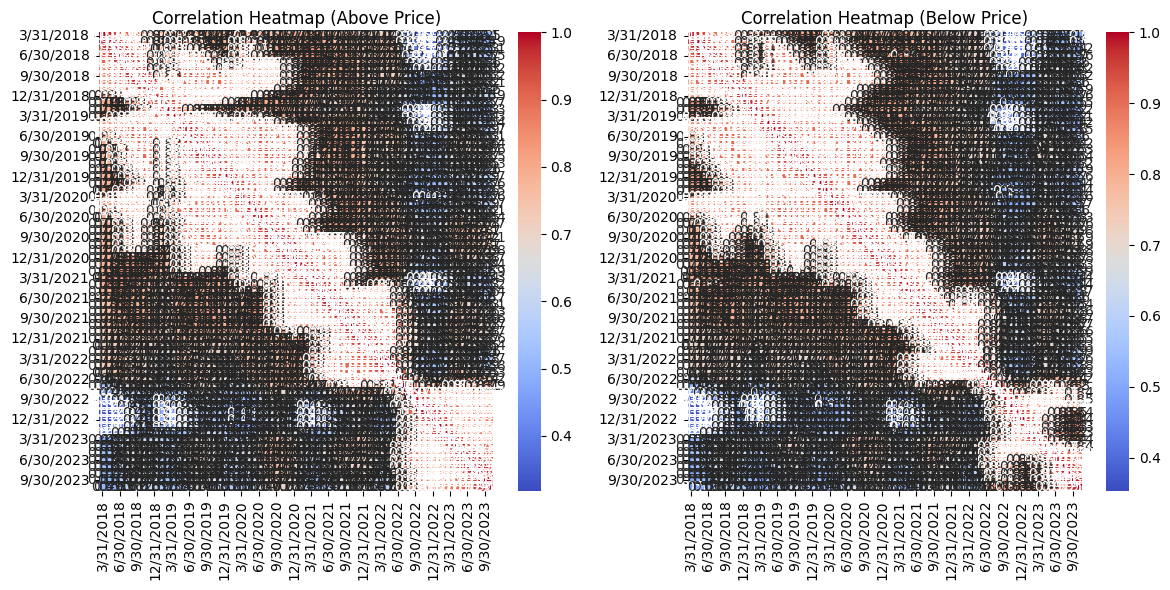

In [14]:
# Correlation heatmap
correlation_above = above_price_df.iloc[:, 5:].corr()
correlation_below = below_price_df.iloc[:, 5:].corr()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_above, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Above Price)")

plt.subplot(1, 2, 2)
sns.heatmap(correlation_below, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Below Price)")

plt.tight_layout()
plt.show()

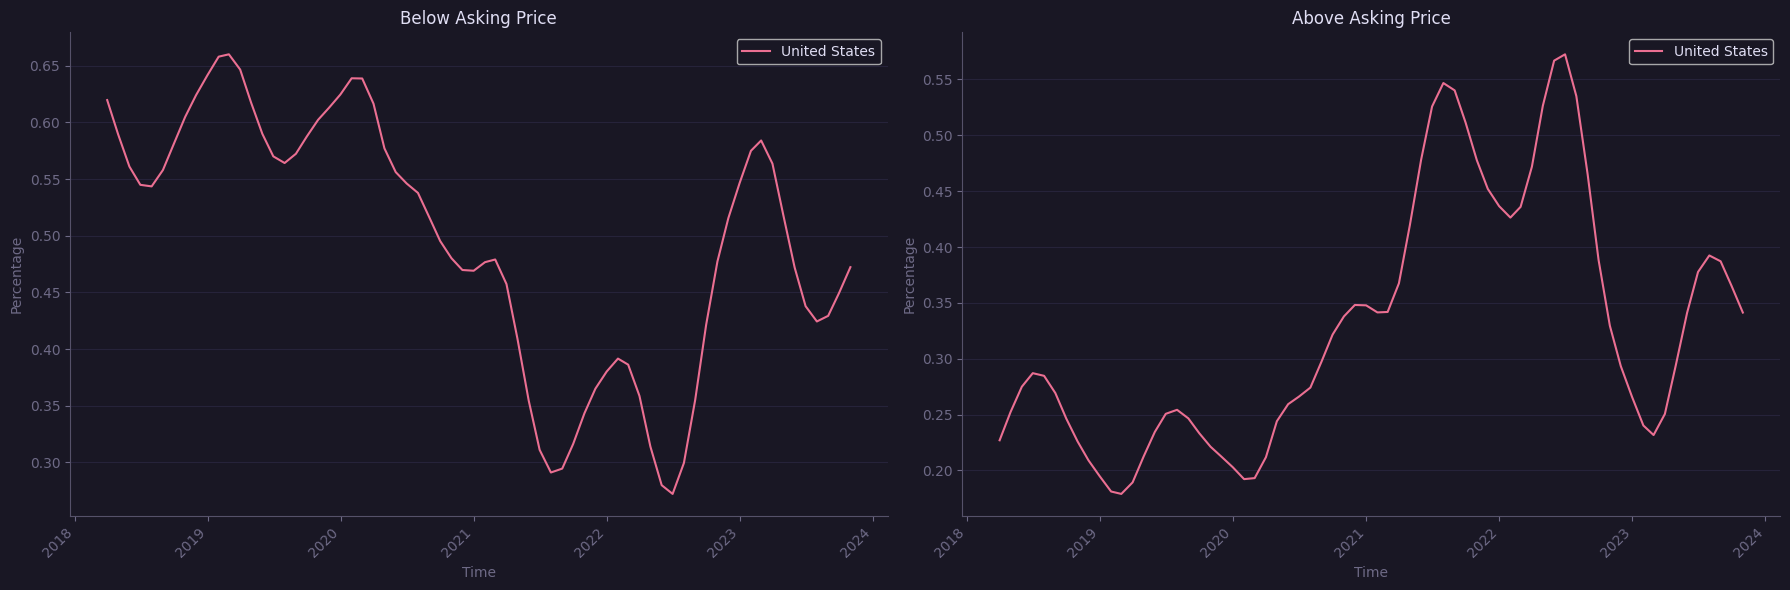

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Rose Pine theme
with plt.style.context("/tmp/rose-pine.mplstyle"):
    desired_regions = ['United States'] #Adjust according to location

    # Filter the DataFrames to include only the desired regions
    above_price_df_filtered = above_price_df[above_price_df['RegionName'].isin(desired_regions)]
    below_price_df_filtered = below_price_df[below_price_df['RegionName'].isin(desired_regions)]

    # Plotting side-by-side comparison
    plt.figure(figsize=(18, 6))

    # Plotting line chart for homes sold below the asking price (Switched the order)
    plt.subplot(1, 2, 1)
    for index, row in below_price_df_filtered.iterrows():
        dates = pd.to_datetime(below_price_df.columns[5:])
        plt.plot(dates, row[5:], label=row['RegionName'])
    plt.title('Below Asking Price')
    plt.xlabel('Time')
    plt.ylabel('Percentage')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate(rotation=45)
    plt.tight_layout()

    # Plotting line chart for homes sold above the asking price
    plt.subplot(1, 2, 2)
    for index, row in above_price_df_filtered.iterrows():
        dates = pd.to_datetime(above_price_df.columns[5:])
        plt.plot(dates, row[5:], label=row['RegionName'])
    plt.title('Above Asking Price')
    plt.xlabel('Time')
    plt.ylabel('Percentage')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate(rotation=45)
    plt.tight_layout()

    plt.show()


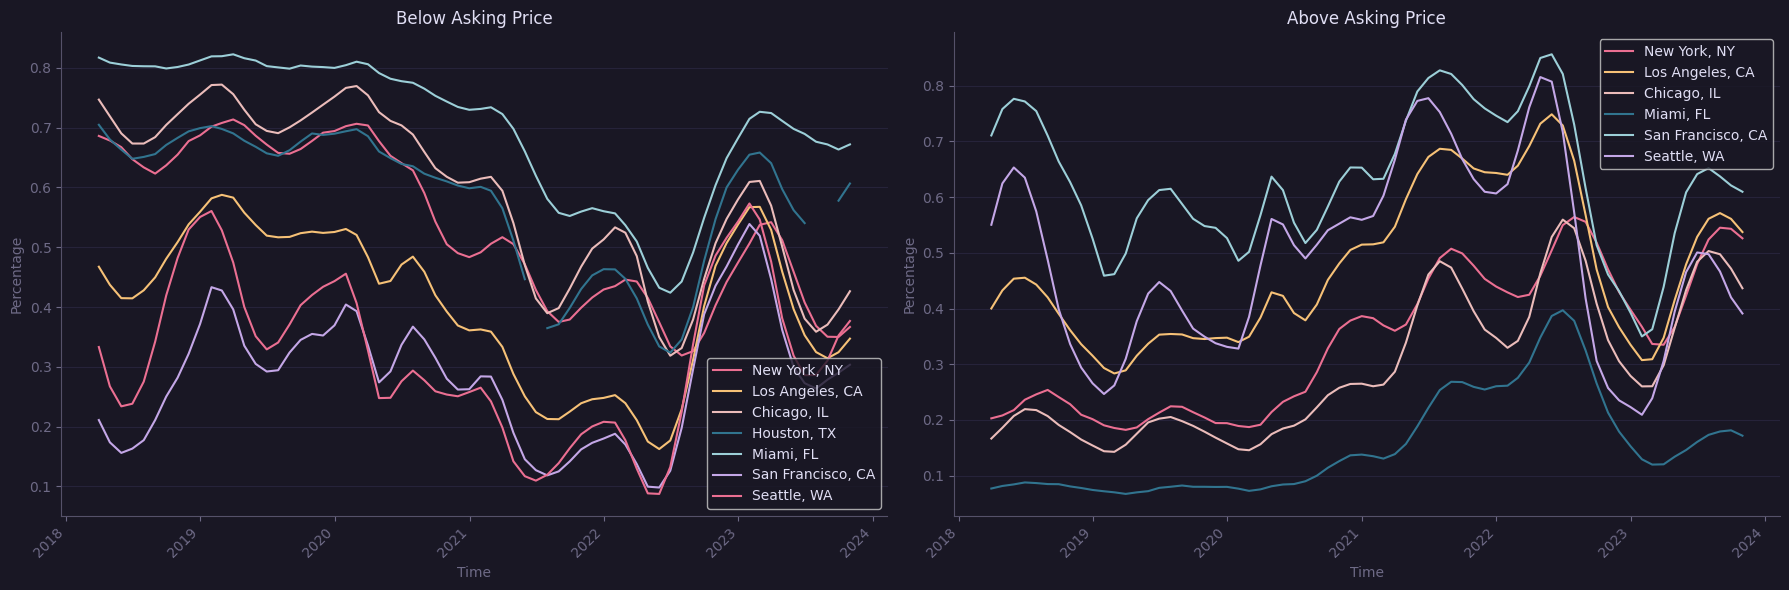

In [74]:
#Aesthetic
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Rose Pine theme
with plt.style.context("/tmp/rose-pine.mplstyle"):
    desired_regions = ['Los Angeles, CA', 'Chicago, IL', 'San Francisco, CA', 'Houston, TX', 'Seattle, WA', 'Miami, FL', 'New York, NY'] #Adjust according to location

    # Filter the DataFrames to include only the desired regions
    below_price_df_filtered = below_price_df[below_price_df['RegionName'].isin(desired_regions)]
    above_price_df_filtered = above_price_df[above_price_df['RegionName'].isin(desired_regions)]

    # Plotting side-by-side comparison
    plt.figure(figsize=(18, 6))

    # Plotting line chart for homes sold below the asking price (Switched the order)
    plt.subplot(1, 2, 1)
    for index, row in below_price_df_filtered.iterrows():
        dates = pd.to_datetime(below_price_df.columns[5:])
        plt.plot(dates, row[5:], label=row['RegionName'])
    plt.title('Below Asking Price')
    plt.xlabel('Time')
    plt.ylabel('Percentage')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate(rotation=45)
    plt.tight_layout()

    # Plotting line chart for homes sold above the asking price
    plt.subplot(1, 2, 2)
    for index, row in above_price_df_filtered.iterrows():
        dates = pd.to_datetime(above_price_df.columns[5:])
        plt.plot(dates, row[5:], label=row['RegionName'])
    plt.title('Above Asking Price')
    plt.xlabel('Time')
    plt.ylabel('Percentage')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate(rotation=45)
    plt.tight_layout()

    plt.show()
